In [1]:
import numpy as np
import birdwatcher as bw
from birdwatcher.movementdetection import detect_movementmog2, detect_movementknn, \
     detect_movementlsbp, create_movementvideo
from birdwatcher.plotting import imshow_frame
import matplotlib.pyplot as plt
%matplotlib inline

This notebook shows movement detection the easy way, using a high-level function.

In [2]:
vfs = bw.testvideosmall() # get a videofilestream object

# Example with MOG2 algorithm

One high-level function can detect movement based on background subtraction. It returns three arrays, which are disk-based darr arrays. They can be very large and hence not fit in RAM. 'coords' provided the coordinates of detected pixels in a ragged array. 'coordscount' the number of pixels per frame, 'coordsmean' the spatial average.

In [4]:
coords, coordscount, coordsmean = detect_movementmog2(vfs, morphologyex=2, analysispath='.',
                                                      ignore_firstnframes=50, overwrite=True,
                                                      VarThreshold=70, NMixtures=8, History=3)

c:\users\gabriel\dropbox\programs\birdwatcher\birdwatcher\coordinatearrays.py:81: RuntimeWarning: Mean of empty slice.
  return np.array([c.mean(0) for c in coordgen])
C:\Users\Gabriel\anaconda3\envs\Sl2020a\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Let's look that frame 200

In [6]:
coords[200]

array([[732, 397],
       [733, 397],
       [732, 398],
       [733, 398],
       [726, 402],
       [727, 402],
       [726, 403],
       [727, 403],
       [726, 404],
       [727, 404],
       [722, 407],
       [723, 407],
       [726, 407],
       [727, 407],
       [722, 408],
       [723, 408],
       [726, 408],
       [727, 408],
       [720, 409],
       [721, 409],
       [723, 409],
       [724, 409],
       [725, 409],
       [726, 409],
       [727, 409],
       [720, 410],
       [721, 410],
       [722, 410],
       [723, 410],
       [724, 410],
       [725, 410],
       [722, 411],
       [723, 411],
       [717, 412],
       [718, 412],
       [719, 412],
       [717, 413],
       [718, 413],
       [719, 413]], dtype=uint16)

we can view the results as a black and white image by the `get_frame` method, which returns a frame instead of coordinates.

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

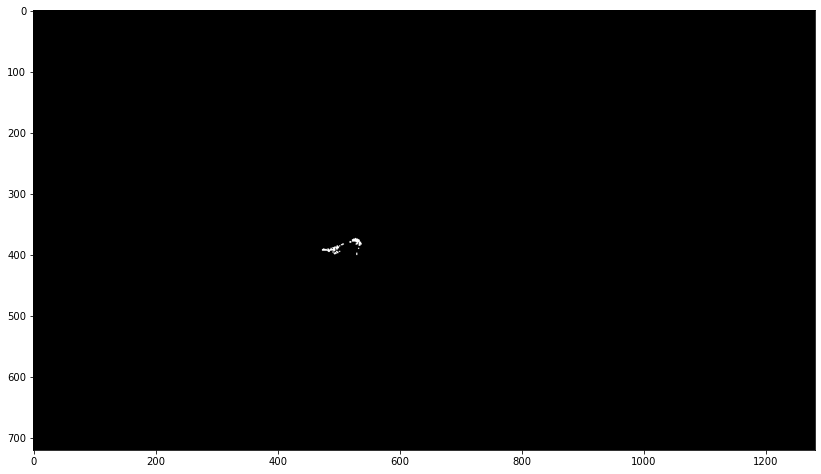

In [7]:
frame = coords.get_frame(130)
imshow_frame(frame)

let's look at the original frame

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

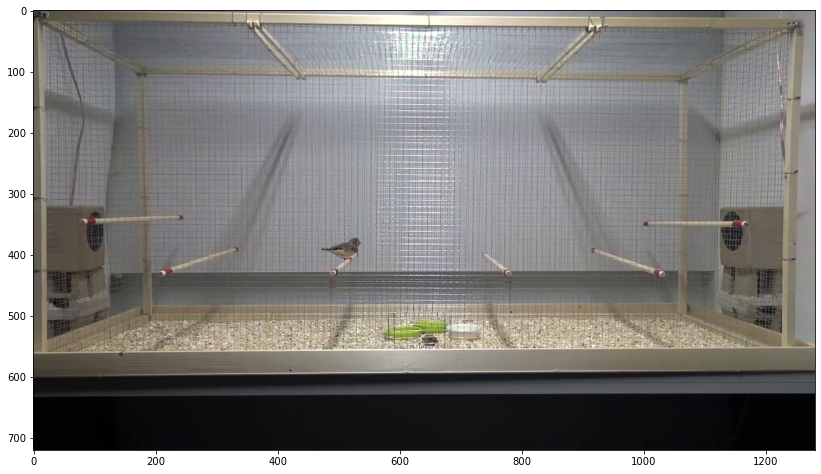

In [8]:
imshow_frame(vf.get_frame(130))

we can create a video of the results as well

In [9]:
coords.tovideo('zf20s_coords.mp4', framerate=vf.avgframerate)

or we can look at the data in plots

Text(0, 0.5, 'number of pixels')

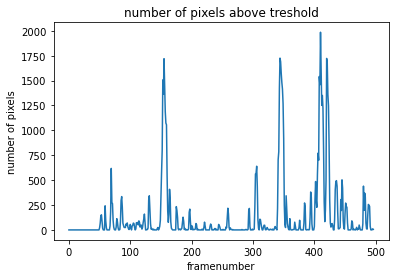

In [10]:
plt.plot(coordscount)
plt.title('number of pixels above treshold')
plt.xlabel('framenumber')
plt.ylabel('number of pixels')

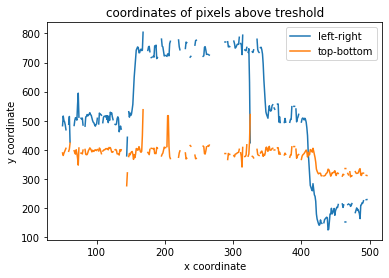

In [11]:
plt.plot(coordsmean)
plt.title('coordinates of pixels above treshold')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend(['left-right', 'top-bottom'])

let's make a video with the original frames + the mean coordinate superimposed on it as a circle

In [12]:
vf_circle = vf.iter_frames().draw_framenumbers().draw_circles(coordsmean).tovideo('zf20s_coords_center.mp4', framerate=vf.avgframerate)

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

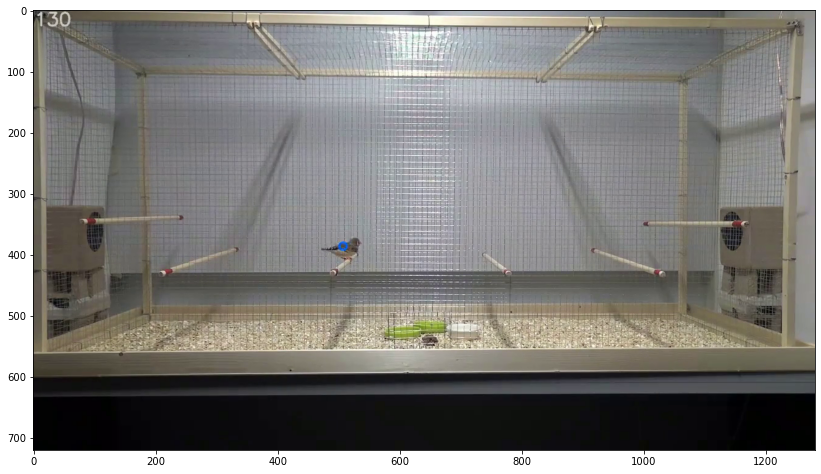

In [13]:
imshow_frame(vf_circle.get_frame(130))

There is also a high-level function that does this for you, and better ;-) It will produce a video next to the original one with results superimposed.

In [8]:
vfs_results = create_movementvideo(vfs,coords, videofilepath='./movementvideoexample.mp4')

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

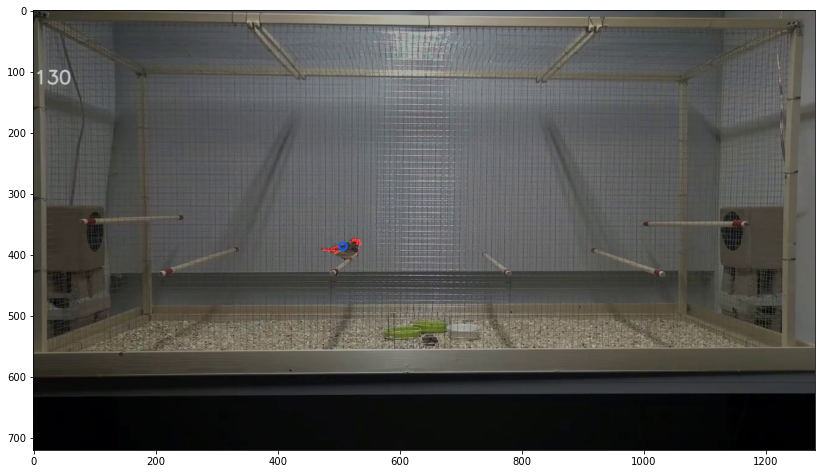

In [9]:
imshow_frame(vfs_results.get_frame(130))

# A different algorithm: KNN

In [12]:
coords, coordscount, coordsmean = detect_movementknn(vf.filepath, morphologyex=2, analysispath='.',
                                                     ignore_firstnframes=50, overwrite=True,
                                                     kNNSamples=0, NSamples=6, Dist2Threshold=500, 
                                                     DetectShadows=False)

c:\users\gabriel\dropbox\programs\birdwatcher\birdwatcher\coordinatearrays.py:81: RuntimeWarning: Mean of empty slice.
  return np.array([c.mean(0) for c in coordgen])
C:\Users\Gabriel\anaconda3\envs\Sl2020a\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

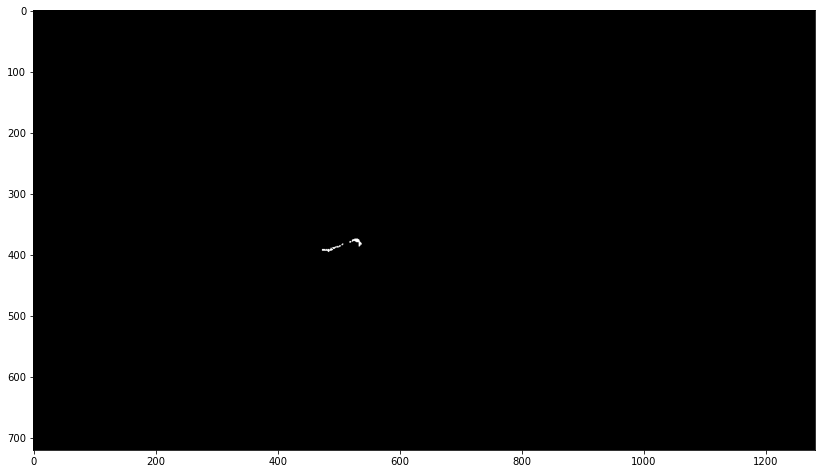

In [13]:
frame = coords.get_frame(130)
imshow_frame(frame)

# Yet another algorithm, LSBP

In [14]:
coords, coordscount, coordsmean = detect_movementlsbp(vf.filepath, morphologyex=2, analysispath='.',
                                                     ignore_firstnframes=50, overwrite=True,
                                                     mc=0, nSamples=20, LSBPRadius=16)

(<Figure size 1008x1792 with 1 Axes>, <AxesSubplot:>)

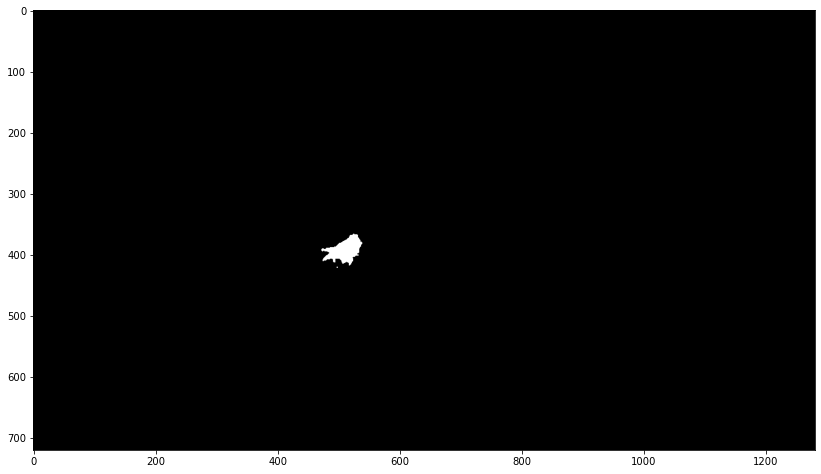

In [15]:
frame = coords.get_frame(130)
imshow_frame(frame)

In [16]:
coords.tovideo('zf20s_coords_lsbp.mp4', framerate=vf.avgframerate)